In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

# Problem Statement
what sorts of people more likely to survive

# EDA

In [4]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
362,1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.00,0,0,CA 31352,21.0000,NaN,S
238,1130,2,"Hiltunen, Miss. Marta",female,18.00,1,1,250650,13.0000,NaN,S
201,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
123,1015,3,"Carver, Mr. Alfred John",male,28.00,0,0,392095,7.2500,NaN,S
310,1202,3,"Cacic, Mr. Jego Grga",male,18.00,0,0,315091,8.6625,NaN,S


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


randomly picking any 5 samples

In [6]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S


**Data Dictionary** :
- Survived -> 0=No 1=Yes
- Pclass -> 1st class, 3rd class
- SibSp ->  # of siblings / spouses aboard the Titanic
- Parch -> # of parents / children aboard the Titanic
- fare 	 
    Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
    Categorical Features: Survived, Sex, Embarked, Pclass
    Alphanumeric Features: Ticket, Cabin
Passenger fare





In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**What are the data types for each feature?**

    Survived: int
    Pclass: int
    Name: string
    Sex: string
    Age: float
    SibSp: int
    Parch: int
    Ticket: string
    Fare: float
    Cabin: string
    Embarked: string

#### IMPORTANT OBSERVATION
   **Numerical Features**: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
   
   **Categorical Features**: Survived, Sex, Embarked, Pclass
   
   **Alphanumeric Features**: Ticket, Cabin

In [8]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- 891 observations present

*check for null values*

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- Cabin feature can be termed useless since 687/891 data is missing
- Embarked feature is safe to use
- Age feature will need something but is usable and important

# Data Viz

Categorical features easy to plot using Bar Plots

(need feature vs survived mostly)

In [11]:
data[data['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [12]:
def bar_chart(feature):
    survived = data[data['Survived']==1][feature].value_counts()
    dead=data[data['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead]) #series converted to dataframe
    df.index=["Survived","Dead"] #without index 
    df.plot(kind='bar',stacked= True,figsize=(12,6))

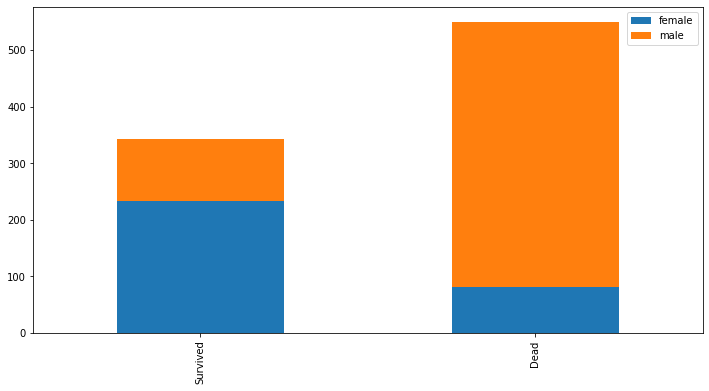

In [13]:
bar_chart('Sex')

can also use

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

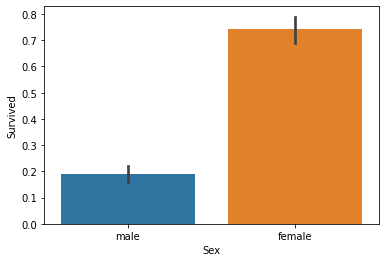

In [14]:
sns.barplot(x="Sex", y="Survived", data=data)

**confirms** female survived more than male

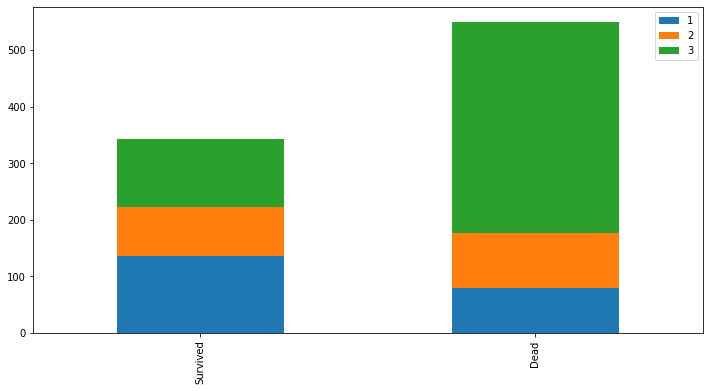

In [15]:
bar_chart('Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

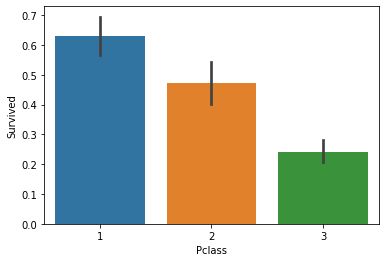

In [16]:
sns.barplot(x="Pclass", y="Survived", data=data)

**confirms** Pclass 1 has best chance of survival while Pclass 3 has highest chance of dying

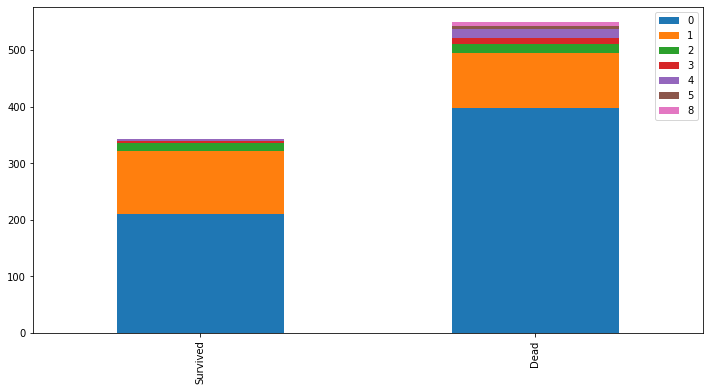

In [17]:
bar_chart('SibSp')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

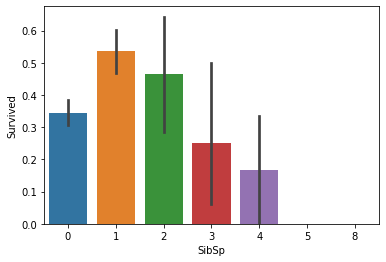

In [18]:
sns.barplot(x="SibSp", y="Survived", data=data)

Person with more Siblings/Spouse less likely to survive **however** Person with 1 or 2 Siblings/Spouse more likely to survive than Person with No siblings/spouse

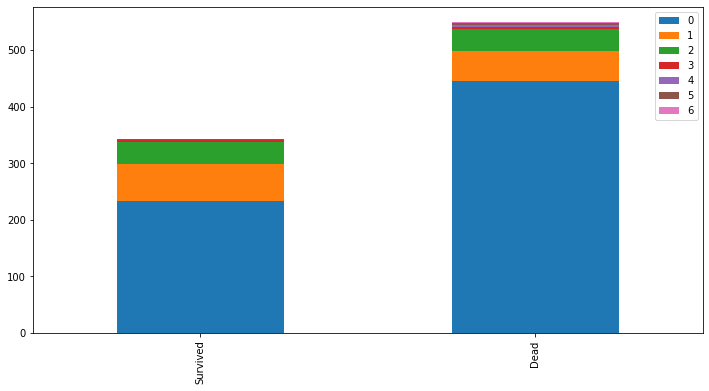

In [19]:
bar_chart('Parch')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

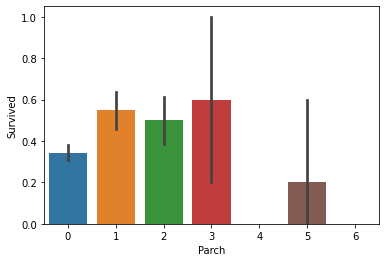

In [20]:
sns.barplot(x="Parch", y="Survived", data=data)

People with 4 or more Parents/Child most likely dead, People with 1,2, or 3 Parent/Child have good chance of survival, People with No parent/child have lesser chance of survival compared to people with 1,2,3 parent/child

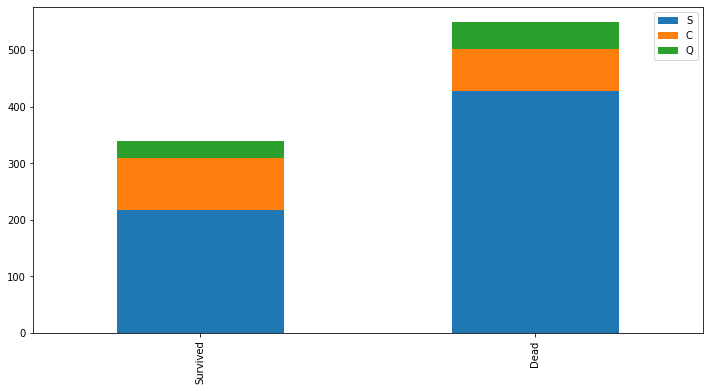

In [21]:
bar_chart('Embarked')

Dont know why this should be useful but plotted anyways

# Feature Engineering

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Name
doesnt look very useful but it contains title information which can be used to seperate married/unmarried, dr. or not

In [23]:
data['title']=data['Name'].str.extract('([A-Za-z]+)\.')
test['title']=test['Name'].str.extract('([A-Za-z]+)\.')
data['title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: title, Length: 891, dtype: object

In [24]:
data['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: title, dtype: int64

since ML algo requires numerical values and not objects we will map this info we get from title to something numerical

In [25]:
data['title']=data['title'].map({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':4,'Rev':4,'Mlle':4,'Major':4,'Col':4,'Countess':4,'Capt':4,'Sir':4,'Lady':4,'Mme':4,'Don':4,'Jankheer':4,'Ms':4})
test['title']=test['title'].map({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':4,'Rev':4,'Mlle':4,'Major':4,'Col':4,'Countess':4,'Capt':4,'Sir':4,'Lady':4,'Mme':4,'Don':4,'Jankheer':4,'Ms':4})

In [26]:
data['title']

0      0.0
1      2.0
2      1.0
3      2.0
4      0.0
      ... 
886    4.0
887    1.0
888    1.0
889    0.0
890    0.0
Name: title, Length: 891, dtype: float64

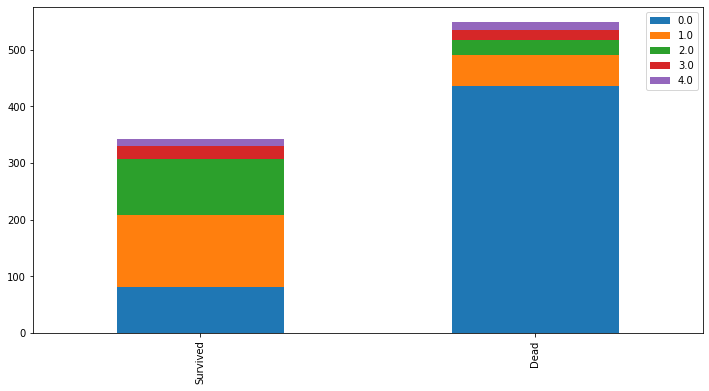

In [27]:
bar_chart('title')

In [28]:
data[['title', 'Survived']].groupby(['title'], as_index=False).mean()

,title,Survived
0,0.0,0.156673
1,1.0,0.697802
2,2.0,0.792000
3,3.0,0.575000
4,4.0,0.461538


A Master has much more chance of survival than a Mr. in the same way unmarried women survived more than married ones. In general females survived more than males.

In [29]:
data.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [30]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


### Age 
had some missing values and can be used more efficiently with different age groups as feature

In [31]:
null_age = data[data['Age'].isnull()]
null_age

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0.0
17,18,1,2,male,NaN,0,0,244373,13.0000,NaN,S,0.0
19,20,1,3,female,NaN,0,0,2649,7.2250,NaN,C,2.0
26,27,0,3,male,NaN,0,0,2631,7.2250,NaN,C,0.0
28,29,1,3,female,NaN,0,0,330959,7.8792,NaN,Q,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0,0,2629,7.2292,NaN,C,0.0
863,864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S,1.0
868,869,0,3,male,NaN,0,0,345777,9.5000,NaN,S,0.0
878,879,0,3,male,NaN,0,0,349217,7.8958,NaN,S,0.0


missing values best filled with mean/median/mode and we can improve the process a bit more by using average of Mr. for Mr. ages and so on 

In [32]:
mr_age=data[data['title']==0]['Age'].median()
mr_age

30.0

In [33]:
miss_age=data[data['title']==1]['Age'].median()
miss_age

21.0

In [34]:
mrs_age=data[data['title']==2]['Age'].median()
mrs_age

35.0

In [35]:
master_age=data[data['title']==3]['Age'].median()
master_age

3.5

In [36]:
special_age=data[data['title']==4]['Age'].median()
special_age

45.0

In [37]:
data['title'][5]

0.0

In [38]:
data.loc[ (data['title']==0) & (np.isnan(data['Age'])), 'Age' ] = mr_age
data.loc[ (data['title']==1) & (np.isnan(data['Age'])), 'Age' ] = miss_age
data.loc[ (data['title']==2) & (np.isnan(data['Age'])), 'Age' ] = mrs_age
data.loc[ (data['title']==3) & (np.isnan(data['Age'])), 'Age' ] = master_age
data.loc[ (data['title']==4) & (np.isnan(data['Age'])), 'Age' ] = special_age

In [39]:
test.loc[ (test['title']==0) & (np.isnan(test['Age'])), 'Age' ] = mr_age
test.loc[ (test['title']==1) & (np.isnan(test['Age'])), 'Age' ] = miss_age
test.loc[ (test['title']==2) & (np.isnan(test['Age'])), 'Age' ] = mrs_age
test.loc[ (test['title']==3) & (np.isnan(test['Age'])), 'Age' ] = master_age
test.loc[ (test['title']==4) & (np.isnan(test['Age'])), 'Age' ] = special_age

In [40]:
data["Age"][19]

35.0

In [41]:
test_null=test[test['title'].isnull()]
test_null

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
414,1306,1,female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [42]:
test['title'].value_counts()

0.0    240
1.0     78
2.0     72
3.0     21
4.0      6
Name: title, dtype: int64

In [43]:
test.loc[ np.isnan(test['title']), 'title' ] = 0.0

In [44]:
test_null=test[test['title'].isnull()]
test_null

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title


In [45]:
null_age = data[data['Age'].isnull()]
null_age

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title


All age null values filled!

Now we can divide the ages into age groups to make it more usable

<AxesSubplot:xlabel='Age', ylabel='Count'>

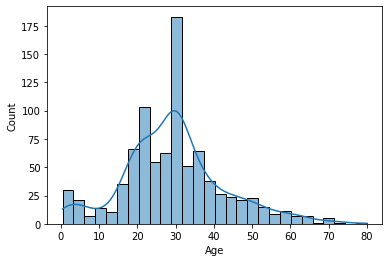

In [46]:
sns.histplot(data,x='Age',kde=True)

child : 0
young adult : 1
adult : 2
senior citizen : 3

In [47]:
data.loc[data['Age']<=16,'Age']=0
data.loc[(data['Age']>16) & (data['Age']<=26),'Age']=1
data.loc[(data['Age']>26) & (data['Age']<=34),'Age']=2
data.loc[(data['Age']>34) & (data['Age']<=60),'Age']=3
data.loc[data['Age']>60,'Age']=4

In [48]:
test.loc[test['Age']<=16,'Age']=0
test.loc[(test['Age']>16) & (test['Age']<=26),'Age']=1
test.loc[(test['Age']>26) & (test['Age']<=34),'Age']=2
test.loc[(test['Age']>34) & (test['Age']<=60),'Age']=3
test.loc[test['Age']>60,'Age']=4

In [49]:
data.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
812,813,0,2,male,3.0,0,0,28206,10.5000,NaN,S,0.0
737,738,1,1,male,3.0,0,0,PC 17755,512.3292,B101,C,0.0
489,490,1,3,male,0.0,1,1,C.A. 37671,15.9000,NaN,S,3.0
677,678,1,3,female,1.0,0,0,4138,9.8417,NaN,S,1.0
325,326,1,1,female,3.0,0,0,PC 17760,135.6333,C32,C,1.0


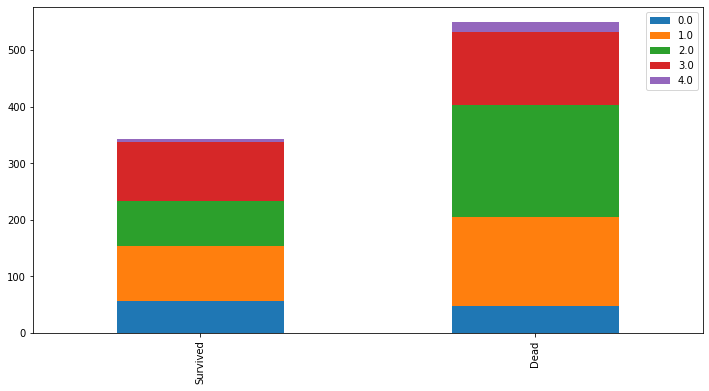

In [50]:
bar_chart('Age')

#### Sex 
another feature which needs to be given numerical representation

In [51]:
sex_mapping = {"male": 0, "female": 1}
data['Sex']=data['Sex'].map(sex_mapping)
test['Sex']=test['Sex'].map(sex_mapping)

In [52]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,S,0.0


**Tickets** feature can be dropped

In [53]:
data=data.drop('Ticket',axis=1)
test=test.drop('Ticket',axis=1)

In [54]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,7.9250,NaN,S,1.0
3,4,1,1,1,3.0,1,0,53.1000,C123,S,2.0
4,5,0,3,0,3.0,0,0,8.0500,NaN,S,0.0


### Fare


In [55]:
null_fare=data[data['Fare'].isna()]
null_fare

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title


No Nan present!

PClass & Cabin should have high correlation with Fare

In [56]:
corrmat = data.corr()
corrmat

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,title
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034818,-0.057527,-0.001652,0.012658,0.003801
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.058553,-0.035322,0.081629,0.257307,0.419252
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.336958,0.083081,0.018443,-0.549500,-0.180612
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.102515,0.114631,0.245489,0.182333,0.513604
Age,0.034818,-0.058553,-0.336958,-0.102515,1.000000,-0.265240,-0.174752,0.114010,-0.110598
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.265240,1.000000,0.414838,0.159651,0.261504
Parch,-0.001652,0.081629,0.018443,0.245489,-0.174752,0.414838,1.000000,0.216225,0.306957
Fare,0.012658,0.257307,-0.549500,0.182333,0.114010,0.159651,0.216225,1.000000,0.140369
title,0.003801,0.419252,-0.180612,0.513604,-0.110598,0.261504,0.306957,0.140369,1.000000


clearly Pclass & Fare has a high negative correlation
i.e 1st class will have max fare (as expected)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

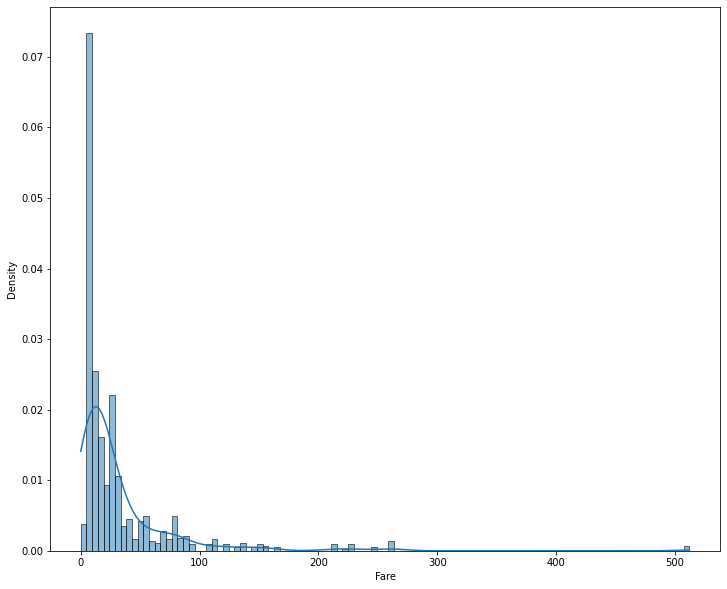

In [57]:
plt.figure(figsize=(12,10))
sns.histplot(data,x="Fare",stat='density',kde=True)

Classifying Fare into numerical categories like we did with age

In [58]:
data.loc[data['Fare']<=15,'Fare']=0
data.loc[(data['Fare']>15) & (data['Fare']<=35),'Fare']=1
data.loc[(data['Fare']>35) & (data['Fare']<=100),'Fare']=2
data.loc[data['Fare']>100,'Fare']=3

In [59]:
test = test.fillna({'Fare':8})

In [60]:
test.loc[test['Fare']<=15,'Fare']=0
test.loc[(test['Fare']>15) & (test['Fare']<=35),'Fare']=1
test.loc[(test['Fare']>35) & (test['Fare']<=100),'Fare']=2
test.loc[test['Fare']>100,'Fare']=3

In [61]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,0.0,NaN,S,0.0
1,2,1,1,1,3.0,1,0,2.0,C85,C,2.0
2,3,1,3,1,1.0,0,0,0.0,NaN,S,1.0
3,4,1,1,1,3.0,1,0,2.0,C123,S,2.0
4,5,0,3,0,3.0,0,0,0.0,NaN,S,0.0


### Cabin

In [62]:
data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [63]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
title            1
dtype: int64

Cabin data has so much missing that it can be termed useless

In [64]:
data=data.drop('Cabin',axis=1)
test=test.drop('Cabin',axis=1)

### Embarked

In [65]:
print("Number of people embarking in Southampton (S):")
southampton = data[data["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = data[data["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = data[data["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [66]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
title          1
dtype: int64

fill the two missing data with the most popular choice ie S

In [67]:
data = data.fillna({"Embarked": "S"})


In [68]:
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
title          1
dtype: int64

filling the one missing title with the most popular title

In [69]:
data['title'].value_counts()

0.0    517
1.0    182
2.0    125
3.0     40
4.0     26
Name: title, dtype: int64

In [70]:
data=data.fillna({"title": 0.0})

In [71]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
title          0
dtype: int64

All Nulls eradicated!

In [72]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,0,1.0,1,0,0.0,S,0.0
1,2,1,1,1,3.0,1,0,2.0,C,2.0
2,3,1,3,1,1.0,0,0,0.0,S,1.0
3,4,1,1,1,3.0,1,0,2.0,S,2.0
4,5,0,3,0,3.0,0,0,0.0,S,0.0


**Embarked** can be made numerical 

In [73]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
data['Embarked'] = data['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)


In [74]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,0,1.0,1,0,0.0,0,0.0
1,2,1,1,1,3.0,1,0,2.0,1,2.0
2,3,1,3,1,1.0,0,0,0.0,0,1.0
3,4,1,1,1,3.0,1,0,2.0,0,2.0
4,5,0,3,0,3.0,0,0,0.0,0,0.0


can create a new column combining **SibSp** and **Parch** to one column of **Familymem**

##### Familymem feature

In [75]:
data['Familymem'] = data['SibSp'] + data['Parch']+1
test['Familymem'] = test['SibSp'] + test['Parch']+1

In [76]:
data=data.drop(['SibSp','Parch'],axis=1)
test=test.drop(['SibSp','Parch'],axis=1)

In [77]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title,Familymem
0,1,0,3,0,1.0,0.0,0,0.0,2
1,2,1,1,1,3.0,2.0,1,2.0,2
2,3,1,3,1,1.0,0.0,0,1.0,1
3,4,1,1,1,3.0,2.0,0,2.0,2
4,5,0,3,0,3.0,0.0,0,0.0,1


In [78]:
data['Age'].value_counts()

2.0    278
1.0    255
3.0    232
0.0    104
4.0     22
Name: Age, dtype: int64

In [79]:
data['Fare'].value_counts()

0.0    458
1.0    235
2.0    145
3.0     53
Name: Fare, dtype: int64

since every one of our features are from 0 to 3/4 so with **Feature Scaling** we should convert Familymem to same range

In [80]:
data['Familymem'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Familymem, dtype: int64

In [81]:
family_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2.0,7:2.4,8:2.8,9:3.2,10:3.6,11:4.0}
data['Familymem']=data['Familymem'].map(family_mapping)
test['Familymem']=test['Familymem'].map(family_mapping)

In [82]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title,Familymem
0,1,0,3,0,1.0,0.0,0,0.0,0.4
1,2,1,1,1,3.0,2.0,1,2.0,0.4
2,3,1,3,1,1.0,0.0,0,1.0,0.0
3,4,1,1,1,3.0,2.0,0,2.0,0.4
4,5,0,3,0,3.0,0.0,0,0.0,0.0


forgot to do the same things to test datset

In [83]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,title,Familymem
0,892,3,0,3.0,0.0,2,0.0,0.0
1,893,3,1,3.0,0.0,0,2.0,0.4
2,894,2,0,4.0,0.0,2,0.0,0.0
3,895,3,0,2.0,0.0,0,0.0,0.0
4,896,3,1,1.0,0.0,0,2.0,0.8


### Choosing a Model

In [84]:
from sklearn.model_selection import train_test_split
#splitting into train validation data set (x,y)
predictors = data.drop(['Survived', 'PassengerId'], axis=1)
target = data["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.25, random_state = 0)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

78.92


In [86]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,title,Familymem
0,892,3,0,3.0,0.0,2,0.0,0.0
1,893,3,1,3.0,0.0,0,2.0,0.4
2,894,2,0,4.0,0.0,2,0.0,0.0
3,895,3,0,2.0,0.0,0,0.0,0.0
4,896,3,1,1.0,0.0,0,2.0,0.8


In [87]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
title          0
Familymem      0
dtype: int64

###  Submission File

In [88]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = logreg.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

In [89]:
submission=pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


[Lots of learning from this notebook](https://www.kaggle.com/code/nadintamer/titanic-survival-predictions-beginner)